In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
df1 = pd.read_csv("data/AuctionBatchSimulation_0.25bf.csv", index_col = "Unnamed: 0")
df2 = pd.read_csv("data/NoAuctionNoSharedMemoryBatchSimulation_0.25bf.csv", index_col = "Unnamed: 0")
df3 = pd.read_csv("data/NoAuctionSharedMemoryBatchSimulation_0.25bf.csv", index_col = "Unnamed: 0")

In [3]:
df4 = pd.read_csv("data/AuctionBatchSimulation_0.35bf.csv", index_col = "Unnamed: 0")
df5 = pd.read_csv("data/NoAuctionNoSharedMemoryBatchSimulation_0.35bf.csv", index_col = "Unnamed: 0")
df6 = pd.read_csv("data/NoAuctionSharedMemoryBatchSimulation_0.35bf.csv", index_col = "Unnamed: 0")

In [4]:
df1['bad_food_ratio'] = 0.25
df2['bad_food_ratio'] = 0.25
df3['bad_food_ratio'] = 0.25

df4['bad_food_ratio'] = 0.35
df5['bad_food_ratio'] = 0.35
df6['bad_food_ratio'] = 0.35

In [5]:
df1['type'] = 'auction'
df2['type'] = 'normal'
#df3['type'] = 'shared_vision'

df4['type'] = 'auction'
df5['type'] = 'normal'
#df6['type'] = 'shared_vision'

In [6]:
df_combined = pd.concat([df1,df2,df4,df5])

In [7]:
df_combined['points/step'] =  df_combined['points'] / df_combined['steps_at_termination']  

In [8]:
df_combined

,points,steps_at_termination,bad_food_ratio,type,points/step
0,424,415,0.25,auction,1.021687
1,427,1235,0.25,auction,0.345749
2,426,340,0.25,auction,1.252941
3,426,820,0.25,auction,0.519512
4,424,395,0.25,auction,1.073418
...,...,...,...,...,...
995,421,560,0.35,normal,0.751786
996,425,500,0.35,normal,0.850000
997,422,465,0.35,normal,0.907527
998,421,645,0.35,normal,0.652713


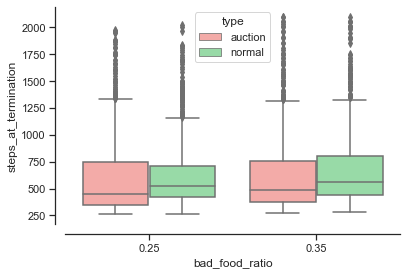

In [9]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="bad_food_ratio", y="steps_at_termination",
            hue="type", palette=["r", "g", 'b'],
            data=df_combined[(np.abs(stats.zscore(df_combined['steps_at_termination'])) < 3)])
sns.despine(offset=10, trim=False)

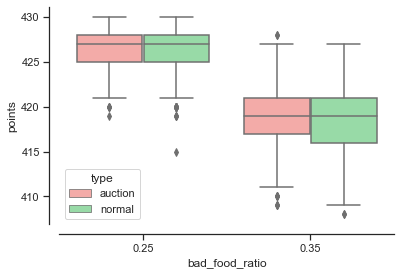

In [10]:
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="bad_food_ratio", y="points",
            hue="type", palette=["r", "g", 'b'],
            data=df_combined[(np.abs(stats.zscore(df_combined['points'])) < 3)])
sns.despine(offset=10, trim=False)

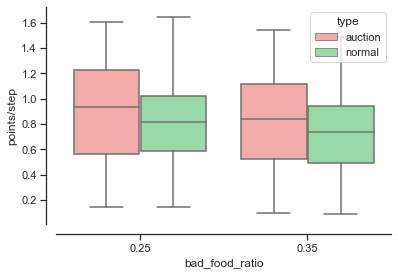

In [14]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="bad_food_ratio", y="points/step",
            hue="type", palette=["r", "g", 'b'],
            data=df_combined[(np.abs(stats.zscore(df_combined['points/step'])) < 3)])
sns.despine(offset=10, trim=False)
sns.move_legend(ax, 'upper right')

In [25]:
df_combined.where((df_combined['type'] == 'auction') & (df_combined['bad_food_ratio'] == 0.25)).dropna()['points/step'].describe()

count    1000.000000
mean        0.886514
std         0.367259
min         0.142762
25%         0.562646
50%         0.934066
75%         1.222857
max         1.607547
Name: points/step, dtype: float64

In [27]:
df_combined.where((df_combined['type'] == 'normal') & (df_combined['bad_food_ratio'] == 0.25)).dropna()['points/step'].describe()

count    1000.000000
mean        0.802244
std         0.295248
min         0.148007
25%         0.585914
50%         0.813462
75%         1.016667
max         1.646154
Name: points/step, dtype: float64

In [30]:
0.886514-0.802244

0.08427000000000007

In [31]:
0.802244/0.08427000000000007

9.51992405363711